In [1]:
from PIL import Image, ImageChops, ImageOps

In [2]:
img1 = Image.open('forest.jpg')
img2 = Image.open('rickroll.jpg')

In [3]:
# img1

In [4]:
# img2

In [5]:
def integer_to_binary(rgb):
    '''
    Convert RGB pixel values from integer to binary
    INPUT: An integer tuple (e.g. (220, 110, 96))
    OUTPUT: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    '''
    r, g, b = rgb
    return ('{0:08b}'.format(r),
            '{0:08b}'.format(g),
            '{0:08b}'.format(b))

In [6]:
def binary_to_integer(rgb):
    '''
    Convert RGB pixel values from binary to integer.
    INPUT: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    OUTPUT: Return an int tuple (e.g. (220, 110, 96))
    '''
    r, g, b = rgb
    return (int(r, 2),
            int(g, 2),
            int(b, 2))

In [7]:
def merge_rgb(rgb1, rgb2):
    '''
    Merge two RGB pixels using 4 least significant bits.
    INPUT: A string tuple (e.g. ("00101010", "11101011", "00010110")),
           Another string tuple (e.g. ("00101010", "11101011", "00010110"))
    OUTPUT: An integer tuple with the two RGB values merged
    '''
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rgb = (r1[:4] + r2[:4],
           g1[:4] + g2[:4],
           b1[:4] + b2[:4])
    return rgb

In [8]:
def merge(image1_path, image2_path):
    '''
    Merge two images. The second one will be merged into the first one.
    INPUT: Path to the first image, path to the second image
    OUTPUT: A new merged image.
    '''
    
    img1 = Image.open(image1_path)
    img2 = Image.open(image2_path)

    # Ensure image 1 is larger than image 2
    if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
        raise ValueError('Image 1 size is lower than image 2 size!')

    # Get the pixel map of the two images
    pixel_map1 = img1.load()
    pixel_map2 = img2.load()

    # Create a new image that will be outputted
    new_image = Image.new(img1.mode, img1.size)
    pixels_new = new_image.load()

    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            rgb1 = integer_to_binary(pixel_map1[i, j])

            # Use a black pixel as default
            rgb2 = integer_to_binary((0, 0, 0))

            # Check if the pixel map position is valid for the second image
            if i < img2.size[0] and j < img2.size[1]:
                rgb2 = integer_to_binary(pixel_map2[i, j])

            # Merge the two pixels and convert it to a integer tuple
            rgb = merge_rgb(rgb1, rgb2)

            pixels_new[i, j] = binary_to_integer(rgb)

    new_image.convert('RGB').save('merged.png')
    
    return new_image

In [9]:
def unmerge(image_path):
    '''
    Unmerge an image.
    INPUT: The path to the input image.
    OUTPUT: The extracted hidden image.
    '''
    
    img = Image.open(image_path)

    # Load the pixel map
    pixel_map = img.load()

    # Create the new image and load the pixel map
    new_image = Image.new(img.mode, img.size)
    pixels_new = new_image.load()

    # Tuple used to store the image original size
    original_size = img.size

    for i in range(img.size[0]):
        for j in range(img.size[1]):
            # Get the RGB (as a string tuple) from the current pixel
            r, g, b = integer_to_binary(pixel_map[i, j])

            # Extract the last 4 bits (corresponding to the hidden image)
            # Concatenate 4 zero bits because we are working with 8 bit values
            rgb = (r[4:] + "0000",
                   g[4:] + "0000",
                   b[4:] + "0000")

            # Convert it to an integer tuple
            pixels_new[i, j] = binary_to_integer(rgb)

            # If this is a 'valid' position, store it
            # as the last valid position
            if pixels_new[i, j] != (0, 0, 0):
                original_size = (i + 1, j + 1)

    # Crop the image based on the 'valid' pixels
    new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

    new_image.save('unmerged.png')
    
    return new_image

In [10]:
merged_image = merge('forest.jpg', 'rickroll.jpg')
# merged_image

In [11]:
unmerged_image = unmerge('merged.png')
# unmerged_image

In [12]:
# ImageOps.equalize(ImageChops.subtract(img1, merged_image))

In [13]:
# ImageOps.equalize(ImageChops.subtract(img2, unmerged_image))

In [14]:
def merge_rgb2(rgb1, rgb2):
    """
    Merge two RGB tuples.
    :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    :param rgb2: Another string tuple (e.g. ("00101010", "11101011", "00010110"))
    :return: An integer tuple with the two RGB values merged.
    """
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rgb = (r1[:6] + r2[:2],
           g1[:6] + g2[:2],
           b1[:6] + b2[:2])
    return rgb

In [15]:
def merge2(img1, img2):
    """
    Merge two images. The second one will be merged into the first one.
    :param img1: First image
    :param img2: Second image
    :return: A new merged image.
    """

    # Check the images dimensions
    if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
        raise ValueError('Image 1 size is lower than image 2 size!')

    # Get the pixel map of the two images
    pixel_map1 = img1.load()
    pixel_map2 = img2.load()

    # Create a new image that will be outputted
    new_image = Image.new(img1.mode, img1.size)
    pixels_new = new_image.load()

    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            rgb1 = integer_to_binary(pixel_map1[i, j])

            # Use a black pixel as default
            rgb2 = integer_to_binary((0, 0, 0))

            # Check if the pixel map position is valid for the second image
            if i < img2.size[0] and j < img2.size[1]:
                rgb2 = integer_to_binary(pixel_map2[i, j])

            # Merge the two pixels and convert it to a integer tuple
            rgb = merge_rgb2(rgb1, rgb2)

            pixels_new[i, j] = binary_to_integer(rgb)

    return new_image

In [16]:
def unmerge2(img):
    """
    Unmerge an image.
    :param img: The input image.
    :return: The unmerged/extracted image.
    """

    # Load the pixel map
    pixel_map = img.load()

    # Create the new image and load the pixel map
    new_image = Image.new(img.mode, img.size)
    pixels_new = new_image.load()

    # Tuple used to store the image original size
    original_size = img.size

    for i in range(img.size[0]):
        for j in range(img.size[1]):
            # Get the RGB (as a string tuple) from the current pixel
            r, g, b = integer_to_binary(pixel_map[i, j])

            # Extract the last 4 bits (corresponding to the hidden image)
            # Concatenate 4 zero bits because we are working with 8 bit values
            rgb = (r[6:] + "000000",
                   g[6:] + "000000",
                   b[6:] + "000000")

            # Convert it to an integer tuple
            pixels_new[i, j] = binary_to_integer(rgb)

            # If this is a 'valid' position, store it
            # as the last valid position
            if pixels_new[i, j] != (0, 0, 0):
                original_size = (i + 1, j + 1)

    # Crop the image based on the 'valid' pixels
    new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

    return new_image

In [17]:
merged_image2 = merge2(img1, img2)
# merged_image2

In [18]:
unmerged_image2 = unmerge2(merged_image2)
# unmerged_image2

In [19]:
# ImageOps.equalize(ImageChops.subtract(img1, merged_image2))

In [20]:
# ImageOps.equalize(ImageChops.subtract(img2, unmerged_image2))

In [21]:
import sys

from PIL import Image
from typing import Union, IO

def hide(input_image: Union[str, IO[bytes]],
        message: str,
        encoding: str = 'UTF-8',
        auto_convert_rgb: bool = False):
    """Hide a message (string) in an image with the
    LSB (Least Significant Bit) technique.
    """
    message_length = len(message)
    assert message_length != 0, "message length is zero"

    img = Image.open(input_image)

    if img.mode not in ['RGB', 'RGBA']:
        if not auto_convert_rgb:
            print('The mode of the image is not RGB. Mode is {}'.\
                                                            format(img.mode))
            answer = input('Convert the image to RGB ? [Y / n]\n') or 'Y'
            if answer.lower() == 'n':
                raise Exception('Not a RGB image.')
        img = img.convert('RGB')

    encoded = img.copy()
    width, height = img.size
    index = 0

    message = str(message_length) + ":" + str(message)
    message_bits = "".join(a2bits_list(message, encoding))
    message_bits += '0' * ((3 - (len(message_bits) % 3)) % 3)

    npixels = width * height
    len_message_bits = len(message_bits)
    if len_message_bits > npixels * 3:
        raise Exception("The message you want to hide is too long: {}". \
                                                        format(message_length))
    for row in range(height):
        for col in range(width):
            if index + 3 <= len_message_bits :

                # Get the colour component.
                pixel = img.getpixel((col, row))
                r = pixel[0]
                g = pixel[1]
                b = pixel[2]

                # Change the Least Significant Bit of each colour component.
                r = setlsb(r, message_bits[index])
                g = setlsb(g, message_bits[index+1])
                b = setlsb(b, message_bits[index+2])

                # Save the new pixel
                if img.mode == 'RGBA':
                    encoded.putpixel((col, row), (r, g, b, pixel[3]))
                else:
                    encoded.putpixel((col, row), (r, g, b))

                index += 3
            else:
                img.close()
                return encoded


def reveal(input_image: Union[str, IO[bytes]], encoding='UTF-8'):
    """Find a message in an image (with the LSB technique).
    """
    img = Image.open(input_image)
    width, height = img.size
    buff, count = 0, 0
    bitab = []
    limit = None
    for row in range(height):
        for col in range(width):

            # pixel = [r, g, b] or [r,g,b,a]
            pixel = img.getpixel((col, row))
            if img.mode == 'RGBA':
                pixel = pixel[:3] # ignore the alpha
            for color in pixel:
                buff += (color&1)<<(ENCODINGS[encoding]-1 - count)
                count += 1
                if count == ENCODINGS[encoding]:
                    bitab.append(chr(buff))
                    buff, count = 0, 0
                    if bitab[-1] == ":" and limit == None:
                        try:
                            limit = int("".join(bitab[:-1]))
                        except:
                            pass

            if len(bitab)-len(str(limit))-1 == limit :
                img.close()
                return "".join(bitab)[len(str(limit))+1:]

In [22]:
import base64
import itertools
from typing import List, Iterator, Tuple, Union
from functools import reduce

ENCODINGS = {
    'UTF-8': 8,
    'UTF-32LE': 32
}

def a2bits(chars: str) -> str:
    """Converts a string to its bits representation as a string of 0's and 1's.
    >>> a2bits("Hello World!")
    '010010000110010101101100011011000110111100100000010101110110111101110010011011000110010000100001'
    """
    return bin(reduce(lambda x, y : (x<<8)+y, (ord(c) for c in chars), 1))[3:]

def a2bits_list(chars):
    """Convert a string to its bits representation as a list of 0's and 1's.
    >>>  a2bits_list("Hello World!")
    ['01001000',
    '01100101',
    '01101100',
    '01101100',
    '01101111',
    '00100000',
    '01010111',
    '01101111',
    '01110010',
    '01101100',
    '01100100',
    '00100001']
    >>> "".join(a2bits_list("Hello World!"))
    '010010000110010101101100011011000110111100100000010101110110111101110010011011000110010000100001'
    """
    return [bin(ord(x))[2:].rjust(8,"0") for x in chars]

def bs(s: int) -> str:
    """Converts an int to its bits representation as a string of 0's and 1's.
    """
    return str(s) if s<=1 else bs(s>>1) + str(s&1)

def setlsb(component: int, bit: str) -> int:
    """Set Least Significant Bit of a colour component.
    """
    return component & ~1 | int(bit)

def n_at_a_time(items: List[int], n: int, fillvalue: str) \
        -> Iterator[Tuple[Union[int, str]]]:
    """Returns an iterator which groups n items at a time.
    Any final partial tuple will be padded with the fillvalue
    >>> list(n_at_a_time([1, 2, 3, 4, 5], 2, 'X'))
    [(1, 2), (3, 4), (5, 'X')]
    """
    it = iter(items)
    return itertools.zip_longest(*[it] * n, fillvalue=fillvalue)

def binary2base64(binary_file: str) -> str:
    """Convert a binary file (OGG, executable, etc.) to a
    printable string.
    """
    # Use mode = "rb" to read binary file
    with open(binary_file, "rb") as bin_file:
        encoded_string = base64.b64encode(bin_file.read())
    return encoded_string.decode()

def base642binary(b64_fname: str) -> bytes:
    """Convert a printable string to a binary file.
    """
    b64_fname += '==='
    return base64.b64decode(b64_fname)

In [23]:
with open('text.txt', 'r') as myfile:
    text = myfile.read()
text

"We're no strangers to love\nYou know the rules and so do I\nA full commitment's what I'm thinking of\nYou wouldn't get this from any other guy\n\nI just wanna tell you how I'm feeling\nGotta make you understand\n\nNever gonna give you up\nNever gonna let you down\nNever gonna run around and desert you\nNever gonna make you cry\nNever gonna say goodbye\nNever gonna tell a lie and hurt you\n\nWe've known each other for so long\nYour heart's been aching but you're too shy to say it\nInside we both know what's been going on\nWe know the game and we're gonna play it\n\nAnd if you ask me how I'm feeling\nDon't tell me you're too blind to see\n\nNever gonna give you up\nNever gonna let you down\nNever gonna run around and desert you\nNever gonna make you cry\nNever gonna say goodbye\nNever gonna tell a lie and hurt you\nNever gonna give you up\nNever gonna let you down\nNever gonna run around and desert you\nNever gonna make you cry\nNever gonna say goodbye\nNever gonna tell a lie and hurt y

In [24]:
def hide(input_image, text):
    '''
    Hide a message (string) in an image with the
    LSB (Least Significant Bit) technique.
    INPUT: path to an RGB image, path to text file
    OUTPUT: new image with text encoded in the image
    '''
    with open(text, 'r') as myfile:
        message = myfile.read()
    
    message_length = len(message)

    img = Image.open(input_image)

    new_image = img.copy()
    width, height = img.size
    index = 0
    
    message = str(message_length) + ':' + str(message)
    message_bits = "".join(a2bits_list(message))
    # ensure message_bits is a multiple of 3, for each color channel
    message_bits += '0' * ((3 - (len(message_bits) % 3)) % 3)

    npixels = width * height
    len_message_bits = len(message_bits)
    if len_message_bits > npixels * 3:
        raise Exception('The message you want to hide is too long: {}'. \
                                                        format(message_length))
    for row in range(height):
        for col in range(width):
            if index + 3 <= len_message_bits :

                # Get the colour component.
                pixel = img.getpixel((col, row))
                r = pixel[0]
                g = pixel[1]
                b = pixel[2]

                # Change the Least Significant Bit of each colour component.
                r = setlsb(r, message_bits[index])
                g = setlsb(g, message_bits[index + 1])
                b = setlsb(b, message_bits[index + 2])

                # Save the new pixel
                new_image.putpixel((col, row), (r, g, b))

                index += 3
            else:
                img.close()
                return new_image

In [25]:
def reveal(input_image):
    '''
    Find a message in an image (with the LSB technique).
    INPUT: path to an RGB image
    OUTPUT: decoded text
    '''
    img = Image.open(input_image)
    width, height = img.size
    buff, count = 0, 0
    bitab = []
    limit = None
    for row in range(height):
        for col in range(width):

            pixel = img.getpixel((col, row))
            for color in pixel:
                # 8 for UTF-8
                buff += (color & 1) << (8 - 1 - count)
                count += 1
                if count == 8:
                    bitab.append(chr(buff))
                    buff, count = 0, 0
                    if bitab[-1] == ':' and limit == None:
                        try:
                            limit = int(''.join(bitab[: -1]))
                        except:
                            pass

            if len(bitab) - len(str(limit)) - 1 == limit:
                img.close()
                return ''.join(bitab)[len(str(limit)) + 1 :]

In [26]:
def a2bits_list(chars):
    '''
    Convert a string (UTF-8) to its bits representation as a list of 0's and 1's.
    >>>  a2bits_list("Hello World!")
    ['01001000',
    '01100101',
    '01101100',
    '01101100',
    '01101111',
    '00100000',
    '01010111',
    '01101111',
    '01110010',
    '01101100',
    '01100100',
    '00100001']
    >>> "".join(a2bits_list("Hello World!"))
    '010010000110010101101100011011000110111100100000010101110110111101110010011011000110010000100001'
    INPUT: string of text
    OUTPUT: string of 0's and 1's
    '''
    return [bin(ord(x))[2:].rjust(8, '0') for x in chars]

In [27]:
def setlsb(component, bit):
    '''
    Set Least Significant Bit of a colour component.
    INPUT: r, g, or b value from 0-255, bit to encode
    OUTPUT: new r, g, or b value with encoded bit
    '''
    return component & ~1 | int(bit)

In [28]:
hidden = hide('forest.jpg', 'text.txt')#*1589)
hidden.save('hidden.bmp')
# hidden

In [29]:
reveal('hidden.bmp')

"We're no strangers to love\nYou know the rules and so do I\nA full commitment's what I'm thinking of\nYou wouldn't get this from any other guy\n\nI just wanna tell you how I'm feeling\nGotta make you understand\n\nNever gonna give you up\nNever gonna let you down\nNever gonna run around and desert you\nNever gonna make you cry\nNever gonna say goodbye\nNever gonna tell a lie and hurt you\n\nWe've known each other for so long\nYour heart's been aching but you're too shy to say it\nInside we both know what's been going on\nWe know the game and we're gonna play it\n\nAnd if you ask me how I'm feeling\nDon't tell me you're too blind to see\n\nNever gonna give you up\nNever gonna let you down\nNever gonna run around and desert you\nNever gonna make you cry\nNever gonna say goodbye\nNever gonna tell a lie and hurt you\nNever gonna give you up\nNever gonna let you down\nNever gonna run around and desert you\nNever gonna make you cry\nNever gonna say goodbye\nNever gonna tell a lie and hurt y

In [30]:
diff = ImageOps.equalize(ImageChops.subtract(hidden, img1))
# diff

In [31]:
# diff.crop((0, 0, 100, 100)).resize((1000, 1000))

In [32]:
# with open('WarAndPeace.txt', 'r') as myfile:
#     warandpeace = myfile.read()
# warandpeace

In [33]:
# stbasils = Image.open('StBasils.jpg').resize((9000, 9000))
# stbasils.save('StBasilsLg.jpg')
# stbasils

In [34]:
# hidden = hide('StBasilsLg.jpg', 'WarAndPeace.txt')

In [35]:
# hidden.save('hidden.bmp')

In [36]:
# hidden

In [37]:
# reveal('hidden.bmp')

In [38]:
# diff = ImageOps.equalize(ImageChops.subtract(hidden, stbasils))
# diff

In [39]:
def encrypt(image_path, text_path):
    '''
    Encrypt a string inside an image using the least significant bits method
    INPUT: string, a path to an image file; string, a path to a text file
    OUTPUT: a bitmap image saved in the root folder with _hidden.bmp appended to the filename
    '''
    
    # check if image is already a bitmap
    if image_path[-4:] != '.bmp':
        img = Image.open(image_path)
        image_path = image_path[:-4] + '.bmp'
        img.save(image_path)

    with open(image_path[:-4] + '.bmp','rb') as bmp_file:
        bmp = bmp_file.read()
    
    with open(text_path,'rb') as to_hide_file:
        msg = to_hide_file.read()
        
    # append the length of the message to the message itself to assist with decoding
    temp = msg.decode('utf-8')
    msg = bytearray(str(len(temp)) + '\n' + temp, 'utf-8')

    # color data begins at the byte at position 10
    start_offset = bmp[10]

    bmpa = bytearray(bmp)
    
    # convert the msg in bytes to bits
    bits = []
    for i in range(len(msg)):
        # a byte can at max be 8 digits long, i.e. 0b11111111 = 255
        # we start at the left most bit (position 7) and work down to 0
        for j in range(7,-1,-1):
            #Create the logic array of bits for our data
            bits.append(nth_bit_present(msg[i],j))

    data_array = bits

    # ensure the image is large enough to contain the text
    assert len(data_array) < len(bmpa) + start_offset

    for i in range(len(data_array)):
        bmpa[i + start_offset] = set_final_bit(bmpa[i + start_offset],data_array[i])

    with open(image_path.replace('.bmp','_hidden.bmp'),'wb') as out:
        out.write(bmpa)

In [40]:
# def hide_data(bmp, msg, image_path):
#     # the byte at position 10 tells us where the color data starts
#     start_offset = bmp[10]

#     bmpa = bytearray(bmp)
#     data_array = data_to_bits(msg)

#     #We need to make sure there is enough space to hide our data
#     assert len(data_array) < len(bmpa) + start_offset

#     for i in range(len(data_array)):
#         bmpa[i + start_offset] = set_final_bit(bmpa[i + start_offset],data_array[i])

#     with open(image_path.replace('.bmp','_hidden.bmp'),'wb') as out:
#         out.write(bmpa)

In [41]:
# def write_hidden_bmp(bytes_to_write, image_path):
#     with open(image_path.replace('.bmp','_hidden.bmp'),'wb') as out:
#         out.write(bytes_to_write)

In [42]:
# def data_to_bits(data):
#     bits = []
#     for i in range(len(data)):
#         #A byte can at max be 8 digits long, i.e. 0b11111111 = 255
#         #We start at the left most bit (position 7) and work down to 0
#         for j in range(7,-1,-1):
#             #Create the logic array of bits for our data
#             bits.append(nth_bit_present(data[i],j))

#     return bits

In [43]:
def nth_bit_present(my_byte,n):
    # bitwise check to see what the nth bit is
    # if anything other than 0, it is TRUE else FALSE
    return (my_byte & (1 << n)) != 0

In [44]:
def set_final_bit(my_byte,ends_in_one):
    new_byte = 0
    if ends_in_one:
        if(nth_bit_present(my_byte,0)):
            new_byte = my_byte #No modification needed, it already ends in one
        else:
            new_byte = my_byte + 1
    else:
        if(nth_bit_present(my_byte,0)):
            new_byte = my_byte - 1
        else:
            new_byte = my_byte #No modification needed, it already ends in zero
    return new_byte

In [45]:
hidden_image = encrypt('forest.jpg', 'text.txt')

In [46]:
def decrypt(image_path):
    with open(image_path,'rb') as bmp_file:
        bmp = bmp_file.read()

    start_offset = bmp[10] #The byte at position 10 tells us where the color data starts

    #Deconstruct each byte and get its final bit
    bits = []
    for i in range(start_offset, len(bmp)):
        bits.append(nth_bit_present(bmp[i], 0))

    #Combine our bit array into bytes
    out_bytes = []
    for i in range(0, len(bits), 8): #Take each 8-bit chunk
        if(len(bits) - i > 8):
            out_bytes.append(bits_to_byte(bits[i: i + 8]))

    #Convert bytes to characters
    out = []
    for b in out_bytes:
        out.append(chr(b))

    output = ''.join(out)
    
    idx = output.find('\n')
    msg_len = int(output[:idx])
    
    msg = output[idx + 1: idx + msg_len + 1]
    
    with open("hidden_message.txt", "w") as text_file:
        text_file.write(msg)
    
    print(msg)

In [47]:
def bits_to_byte(bits):
    # convert 8 bits into 1 byte
    assert len(bits) == 8
    new_byte = 0
    for i in range(8):
        if bits[i]==True:
            #This bit==1 and the "position" we are at in the byte is 7-i
            #Bitwise OR will insert a 1 a this position
            new_byte |= 1 << 7 - i
        else:
            #This bit==0 and the "position" we are at in the byte is 7-i
            #Bitwise OR will insert a 0 a this position
            new_byte |= 0 << 7 - i
    return new_byte

In [48]:
decrypt('forest_hidden.bmp')

We're no strangers to love
You know the rules and so do I
A full commitment's what I'm thinking of
You wouldn't get this from any other guy

I just wanna tell you how I'm feeling
Gotta make you understand

Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you

We've known each other for so long
Your heart's been aching but you're too shy to say it
Inside we both know what's been going on
We know the game and we're gonna play it

And if you ask me how I'm feeling
Don't tell me you're too blind to see

Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you

Never gonna give, never gonna g

In [49]:
binary_to_integer(('11110000', '01000000', '01000000')) # salmon

(240, 64, 64)

In [50]:
integer_to_binary((240, 120, 20))

('11110000', '01111000', '00010100')

In [51]:
binary_to_integer(('11110001', '01111001', '00010101'))

(241, 121, 21)

In [52]:
binary_to_integer(('11110010', '01111010', '00010110'))

(242, 122, 22)

In [53]:
binary_to_integer(('11110100', '01111100', '00010000'))

(244, 124, 16)

In [54]:
binary_to_integer(('11111000', '01110000', '00011100'))

(248, 112, 28)

In [55]:
binary_to_integer(('11100000', '01101000', '00000100'))

(224, 104, 4)

In [56]:
binary_to_integer(('11010000', '01011000', '00110100'))

(208, 88, 52)

In [57]:
binary_to_integer(('10110000', '00111000', '01010100'))

(176, 56, 84)

In [58]:
binary_to_integer(('01110000', '11111000', '10010100'))

(112, 248, 148)

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


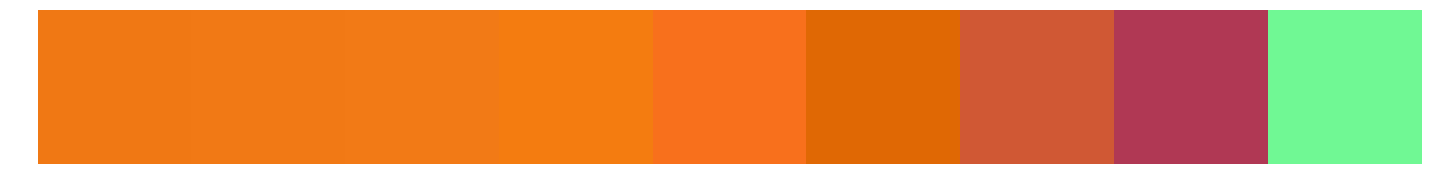

In [60]:
# Orange palate
color = np.array([[240,   120,   20],
                  [241,   121,   21],
                  [242,   122,   22],
                  [244,   124,   16],
                  [248,   112,   28],
                  [224,   104,   4],
                  [208,   88,    52],
                  [176,   56,    84],
                  [112,   248,   148]
                 ], dtype=np.uint8)
indices = [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
plt.figure(figsize=(20, 30))
plt.axis('off')
io.imshow(color[[indices]])
plt.show()

[[240  64  64]
 [241  65  65]
 [243  67  67]
 [247  71  71]
 [255  79  79]
 [239  95  95]
 [207 127 127]
 [143  63  63]
 [ 15 191 191]]


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


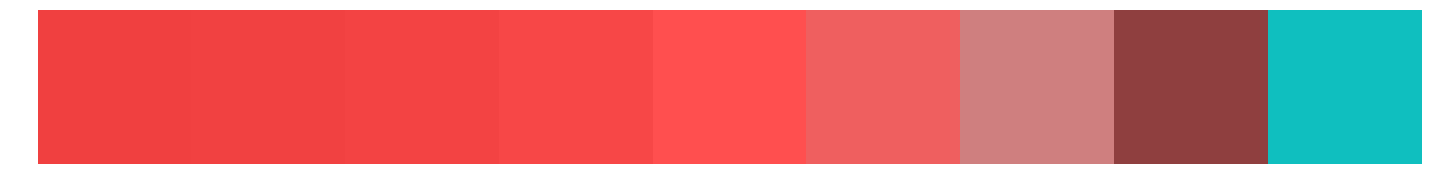

In [61]:
# Salmon palate
val0 = binary_to_integer(('11110000', '01000000', '01000000'))
val1 = binary_to_integer(('11110001', '01000001', '01000001'))
val2 = binary_to_integer(('11110011', '01000011', '01000011'))
val3 = binary_to_integer(('11110111', '01000111', '01000111'))
val4 = binary_to_integer(('11111111', '01001111', '01001111'))
val5 = binary_to_integer(('11101111', '01011111', '01011111'))
val6 = binary_to_integer(('11001111', '01111111', '01111111'))
val7 = binary_to_integer(('10001111', '00111111', '00111111'))
val8 = binary_to_integer(('00001111', '10111111', '10111111'))

color = np.array([[val0[0], val0[1], val0[2]],
                  [val1[0], val1[1], val1[2]],
                  [val2[0], val2[1], val2[2]],
                  [val3[0], val3[1], val3[2]],
                  [val4[0], val4[1], val4[2]],
                  [val5[0], val5[1], val5[2]],
                  [val6[0], val6[1], val6[2]],
                  [val7[0], val7[1], val7[2]],
                  [val8[0], val8[1], val8[2]]
                 ], dtype=np.uint8)
print(color)
indices = [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
plt.figure(figsize=(20, 30))
plt.axis('off')
io.imshow(color[[indices]])
plt.show()

[[240  64  64]
 [240  64  64]
 [240  64  64]
 [240  64  64]
 [240  64  64]
 [224  80  80]
 [192 112 112]
 [128  48  48]
 [  0 176 176]]


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


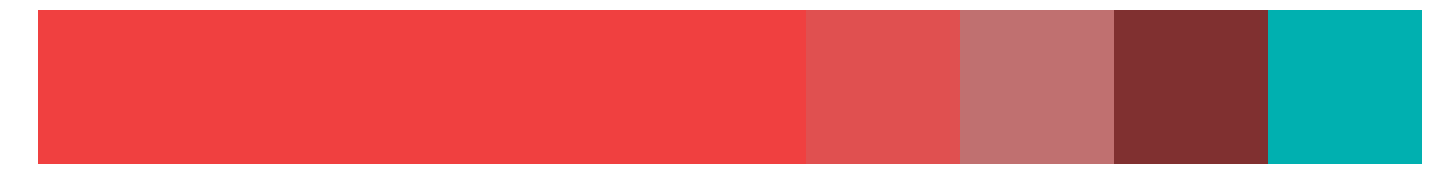

In [62]:
# Salmon palate, LSB set to 0's
val0 = binary_to_integer(('11110000', '01000000', '01000000'))
val1 = binary_to_integer(('11110000', '01000000', '01000000'))
val2 = binary_to_integer(('11110000', '01000000', '01000000'))
val3 = binary_to_integer(('11110000', '01000000', '01000000'))
val4 = binary_to_integer(('11110000', '01000000', '01000000'))
val5 = binary_to_integer(('11100000', '01010000', '01010000'))
val6 = binary_to_integer(('11000000', '01110000', '01110000'))
val7 = binary_to_integer(('10000000', '00110000', '00110000'))
val8 = binary_to_integer(('00000000', '10110000', '10110000'))

color = np.array([[val0[0], val0[1], val0[2]],
                  [val1[0], val1[1], val1[2]],
                  [val2[0], val2[1], val2[2]],
                  [val3[0], val3[1], val3[2]],
                  [val4[0], val4[1], val4[2]],
                  [val5[0], val5[1], val5[2]],
                  [val6[0], val6[1], val6[2]],
                  [val7[0], val7[1], val7[2]],
                  [val8[0], val8[1], val8[2]]
                 ], dtype=np.uint8)
print(color)
indices = [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
plt.figure(figsize=(20, 30))
plt.axis('off')
io.imshow(color[[indices]])
plt.show()

[[240  64  64]
 [247  79  73]
 [112 248 148]
 [112 240 144]
 [240  64  64]
 [224  80  80]
 [192 112 112]
 [128  48  48]
 [  0 176 176]]


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


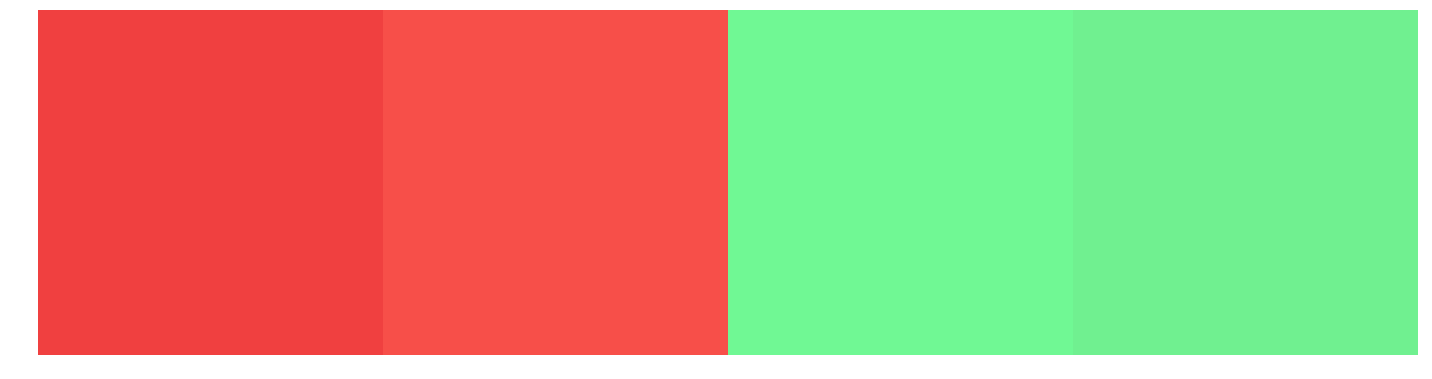

In [63]:
# Salmon, salmon with green inserted, green, green decoded
val0 = binary_to_integer(('11110000', '01000000', '01000000')) # salmon
val1 = binary_to_integer(('11110111', '01001111', '01001001')) # salmon with green inserted
val2 = binary_to_integer(('01110000', '11111000', '10010100')) # green
val3 = binary_to_integer(('01110000', '11110000', '10010000')) # green decoded


val5 = binary_to_integer(('11100000', '01010000', '01010000'))
val6 = binary_to_integer(('11000000', '01110000', '01110000'))
val7 = binary_to_integer(('10000000', '00110000', '00110000'))
val8 = binary_to_integer(('00000000', '10110000', '10110000'))

color = np.array([[val0[0], val0[1], val0[2]],
                  [val1[0], val1[1], val1[2]],
                  [val2[0], val2[1], val2[2]],
                  [val3[0], val3[1], val3[2]],
                  [val4[0], val4[1], val4[2]],
                  [val5[0], val5[1], val5[2]],
                  [val6[0], val6[1], val6[2]],
                  [val7[0], val7[1], val7[2]],
                  [val8[0], val8[1], val8[2]]
                 ], dtype=np.uint8)
print(color)
indices = [[0, 1, 2, 3]]
plt.figure(figsize=(20, 30))
plt.axis('off')
io.imshow(color[[indices]])
plt.show()

[[2 1 0 3 4 2]
 [4 5 0 0 3 1]
 [3 2 1 2 5 5]
 [5 3 5 3 3 4]]


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


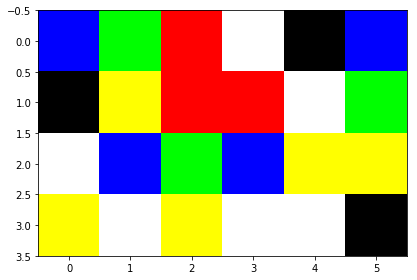

In [64]:
palette = np.array([[255,   0,   0], # index 0: red
                    [  0, 255,   0], # index 1: green
                    [  0,   0, 255], # index 2: blue
                    [255, 255, 255], # index 3: white
                    [  0,   0,   0], # index 4: black
                    [255, 255,   0], # index 5: yellow
                    ], dtype=np.uint8)
m, n = 4, 6
indices = np.random.randint(0, len(palette), size=(m, n))
print(indices)
io.imshow(palette[[indices]])

[[240  64  64]
 [241  65  65]
 [242  66  66]
 [244  68  68]
 [248  72  72]
 [224  80  80]
 [208  96  96]
 [176   0   0]
 [112 192 192]]


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


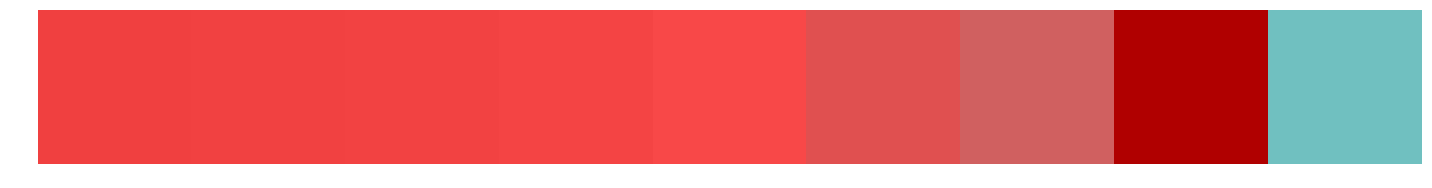

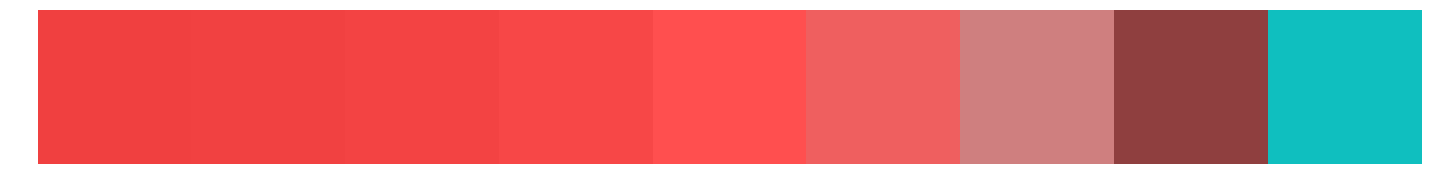

In [65]:
# Salmon palate, cumulative bits changed
val0 = binary_to_integer(('11110000', '01000000', '01000000'))
val1 = binary_to_integer(('11110001', '01000001', '01000001'))
val2 = binary_to_integer(('11110010', '01000010', '01000010'))
val3 = binary_to_integer(('11110100', '01000100', '01000100'))
val4 = binary_to_integer(('11111000', '01001000', '01001000'))
val5 = binary_to_integer(('11100000', '01010000', '01010000'))
val6 = binary_to_integer(('11010000', '01100000', '01100000'))
val7 = binary_to_integer(('10110000', '00000000', '00000000'))
val8 = binary_to_integer(('01110000', '11000000', '11000000'))

color = np.array([[val0[0], val0[1], val0[2]],
                  [val1[0], val1[1], val1[2]],
                  [val2[0], val2[1], val2[2]],
                  [val3[0], val3[1], val3[2]],
                  [val4[0], val4[1], val4[2]],
                  [val5[0], val5[1], val5[2]],
                  [val6[0], val6[1], val6[2]],
                  [val7[0], val7[1], val7[2]],
                  [val8[0], val8[1], val8[2]]
                 ], dtype=np.uint8)
print(color)
indices = [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
plt.figure(figsize=(20, 30))
plt.axis('off')
io.imshow(color[[indices]])
plt.show()




# Salmon palate, one bit at a time changed
val0 = binary_to_integer(('11110000', '01000000', '01000000'))
val1 = binary_to_integer(('11110001', '01000001', '01000001'))
val2 = binary_to_integer(('11110011', '01000011', '01000011'))
val3 = binary_to_integer(('11110111', '01000111', '01000111'))
val4 = binary_to_integer(('11111111', '01001111', '01001111'))
val5 = binary_to_integer(('11101111', '01011111', '01011111'))
val6 = binary_to_integer(('11001111', '01111111', '01111111'))
val7 = binary_to_integer(('10001111', '00111111', '00111111'))
val8 = binary_to_integer(('00001111', '10111111', '10111111'))

color = np.array([[val0[0], val0[1], val0[2]],
                  [val1[0], val1[1], val1[2]],
                  [val2[0], val2[1], val2[2]],
                  [val3[0], val3[1], val3[2]],
                  [val4[0], val4[1], val4[2]],
                  [val5[0], val5[1], val5[2]],
                  [val6[0], val6[1], val6[2]],
                  [val7[0], val7[1], val7[2]],
                  [val8[0], val8[1], val8[2]]
                 ], dtype=np.uint8)
indices = [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
plt.figure(figsize=(20, 30))
plt.axis('off')
io.imshow(color[[indices]])
plt.show()